In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
from IPython.display import display
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

import pathlib
import os
import sys

# for selection the right path
import os,sys,inspect,pathlib
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.model_trainer_reg import *
from common.regression_plotfunctions import *

from GD.LinearRegression import LinearRegression
from KNN.KNNRegressor import KNNRegressor

import moneyball_preprocession


In [2]:
# Custom functions

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Moneyball', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages

In [3]:
datapath = get_data_path("Moneyball", "baseball.csv")
display(datapath)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Datasets/Moneyball/baseball.csv')

In [4]:
df_raw = pd.read_csv(datapath)

# Train and Test

In [5]:
X, Y = moneyball_preprocession.preprocessing(df_raw, drop_missing_values=False)

## SGD-Regression

In [6]:
MODEL = SGDRegressor
NAME = "SGD"
PATH = "out/"+NAME+"/"
params = {"alpha" : [0.0001]}
n_splits = 2

modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_SGD = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8805702755730968
Total evaluation time = 0.18s


,alpha,train_time,inference_time,R2_score,RMSE,MGE
0,0.0001,0.004112,0.000352,0.88057,16.134127,0.002774


('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8602494199052826
Total evaluation time = 0.18s


,alpha,train_time,inference_time,R2_score,RMSE,MGE
0,0.0001,0.008611,0.000472,0.860249,16.058543,0.002595


('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8805702755730968
Total evaluation time = 0.18s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8602494199052826
Total evaluation time = 0.18s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8602494199052826
Total evaluation time = 0.17s


,alpha,train_time,inference_time,R2_score,RMSE,MGE
0,0.0001,0.005116,0.000299,0.860249,16.058543,0.002595


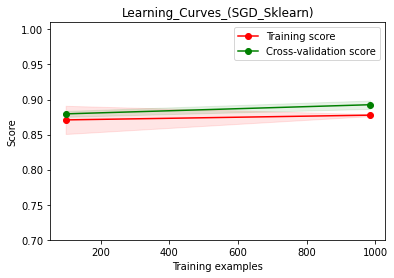

In [7]:
plt.figure()
plt.grid()
title = "Learning_Curves_(SGD_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=0)

estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.7, 1.01), cv=cv, n_jobs=4,train_sizes=np.linspace(.1, 1.0, n_splits))
plt.savefig(PATH+title)
plt.show()

In [8]:
MODEL = LinearRegression
params = {"alpha" : [0.0001],
         "max_iter": [1000]}


modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
#score_list_SGD_own = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
#modeltrainer.train()
#res = modeltrainer.result
#display(res)

('alpha', 'max_iter') ([0.0001], [1000])
Finished evaluation
R2_score= 0.8783714552772492
Total evaluation time = 0.40s


,alpha,max_iter,train_time,inference_time,R2_score,RMSE,MGE
0,0.0001,1000,0.244556,0.000057,0.878371,16.431173,0.002826


('alpha', 'max_iter') ([0.0001], [1000])
Finished evaluation
R2_score= 0.8575819386373004
Total evaluation time = 0.28s


,alpha,max_iter,train_time,inference_time,R2_score,RMSE,MGE
0,0.0001,1000,0.185212,0.000043,0.857582,16.36506,0.00265


## KNN-Regression

In [9]:
MODEL = KNeighborsRegressor
params = {"n_neighbors": [5],
        "weights" : ["uniform"],
        "algorithm": ["brute","kd_tree","ball_tree"]}
NAME = "KNN"
PATH = "out/"+NAME+"/"


modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_KNN = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7934657930500222
Total evaluation time = 0.19s


,n_neighbors,weights,algorithm,train_time,inference_time,R2_score,RMSE,MGE
0,5,uniform,brute,0.003141,0.031856,0.793466,27.901339,0.00475
1,5,uniform,kd_tree,0.004849,0.015133,0.793466,27.901339,0.00475
2,5,uniform,ball_tree,0.003239,0.017544,0.793466,27.901339,0.00475


('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7672145778386318
Total evaluation time = 0.19s


,n_neighbors,weights,algorithm,train_time,inference_time,R2_score,RMSE,MGE
0,5,uniform,brute,0.001504,0.023267,0.767215,26.749047,0.004315
1,5,uniform,kd_tree,0.003269,0.013502,0.767215,26.749047,0.004315
2,5,uniform,ball_tree,0.003130,0.027170,0.767215,26.749047,0.004315


('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7934657930500222
Total evaluation time = 0.18s
('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7672145778386318
Total evaluation time = 0.18s
('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7672145778386318
Total evaluation time = 0.18s


,n_neighbors,weights,algorithm,train_time,inference_time,R2_score,RMSE,MGE
0,5,uniform,brute,0.001064,0.038029,0.767215,26.749047,0.004315
1,5,uniform,kd_tree,0.003186,0.012352,0.767215,26.749047,0.004315
2,5,uniform,ball_tree,0.002910,0.014246,0.767215,26.749047,0.004315


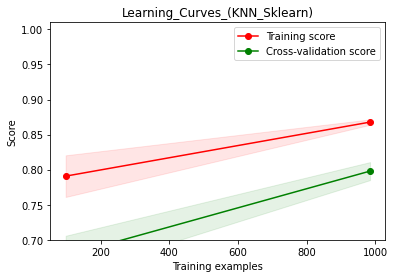

In [10]:
plt.figure()
plt.grid()

title = "Learning_Curves_(KNN_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = KNeighborsRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.7, 1.01), cv=cv, n_jobs=4,train_sizes=np.linspace(.1, 1.0, n_splits))
plt.savefig(PATH+title)
plt.show()

In [11]:
MODEL = KNNRegressor
params = {"n_neighbors" : [5],
           "p": [2]}
           #"weights": ["uniform"]}
NAME = "KNN"
PATH = "out/"+NAME+"/"


modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_KNN_own = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7934657930500222
Total evaluation time = 0.19s


,n_neighbors,p,train_time,inference_time,R2_score,RMSE,MGE
0,5,2,0.000018,0.062688,0.793466,27.901339,0.00475


('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7672145778386318
Total evaluation time = 0.19s


,n_neighbors,p,train_time,inference_time,R2_score,RMSE,MGE
0,5,2,0.000021,0.046617,0.767215,26.749047,0.004315


('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7934657930500222
Total evaluation time = 0.19s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7672145778386318
Total evaluation time = 0.18s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7672145778386318
Total evaluation time = 0.18s


,n_neighbors,p,train_time,inference_time,R2_score,RMSE,MGE
0,5,2,0.000018,0.046722,0.767215,26.749047,0.004315


## RF-Regression

In [12]:
MODEL = RandomForestRegressor
params = {"n_estimators" : [100]}
NAME = "RF"
PATH = "out/"+NAME+"/"


modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_RF = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8536897582657175
Total evaluation time = 0.59s


,n_estimators,train_time,inference_time,R2_score,RMSE,MGE
0,100,0.444014,0.016282,0.85369,19.765499,0.003316


('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8327755397011359
Total evaluation time = 0.58s


,n_estimators,train_time,inference_time,R2_score,RMSE,MGE
0,100,0.393555,0.017193,0.832776,19.215528,0.003078


('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8536897582657175
Total evaluation time = 0.58s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8327755397011359
Total evaluation time = 0.59s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8327755397011359
Total evaluation time = 0.58s


,n_estimators,train_time,inference_time,R2_score,RMSE,MGE
0,100,0.388531,0.016326,0.832776,19.215528,0.003078


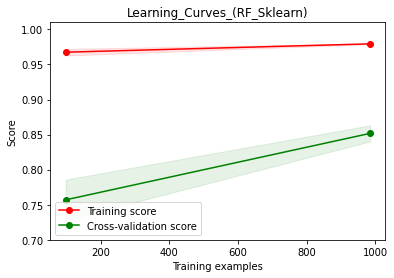

In [13]:
plt.figure()
plt.grid()

title = "Learning_Curves_(RF_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.7, 1.01), cv=cv, n_jobs=4,train_sizes=np.linspace(.1, 1.0, n_splits))
plt.savefig(PATH+title)
plt.show()

## DT-Regression

In [14]:
MODEL = DecisionTreeRegressor
params = {"criterion": ["mse"]}
NAME = "DT"
PATH = "out/"+NAME+"/"


modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_DT = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7201538491807058
Total evaluation time = 0.20s


,criterion,train_time,inference_time,R2_score,RMSE,MGE
0,mse,0.007907,0.000494,0.720154,37.805274,0.006254


('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.6921973745740002
Total evaluation time = 0.19s


,criterion,train_time,inference_time,R2_score,RMSE,MGE
0,mse,0.006383,0.000411,0.692197,35.369168,0.005727


('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7201538491807058
Total evaluation time = 0.18s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.6921973745740002
Total evaluation time = 0.18s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.6921973745740002
Total evaluation time = 0.19s


,criterion,train_time,inference_time,R2_score,RMSE,MGE
0,mse,0.006791,0.000359,0.692197,35.369168,0.005727


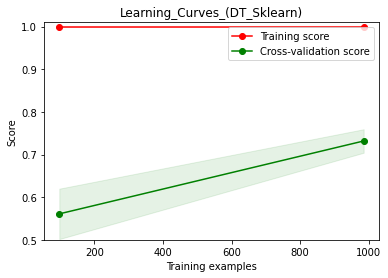

In [15]:
plt.figure()
plt.grid()

title = "Learning_Curves_(DT_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = DecisionTreeRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.5, 1.01), cv=cv, n_jobs=4,train_sizes=np.linspace(.1, 1.0, n_splits))
plt.savefig(PATH+title)
plt.show()

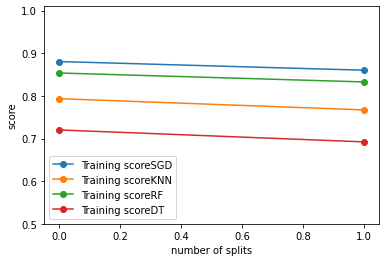

In [16]:
plot_learning_curve_own(score_list_SGD,"SGD", ylim=(0.5, 1.01))
plot_learning_curve_own(score_list_KNN,"KNN")
plot_learning_curve_own(score_list_RF,"RF")
plot_learning_curve_own(score_list_DT,"DT")
plt.savefig("out/shuffle_vs_score")

In [17]:
#plot_learning_curve_own(score_list_SGD_own,"SGD_own", ylim=(0.2, 0.4))
#plot_learning_curve_own(score_list_KNN_own,"KNN_own")
#plt.savefig("out/shuffle_own_vs_score")

NameError: name 'score_list_SGD_own' is not defined